 <h1 align = center> Principles of Object Oriented Programming </h1>

#### 4 principles
- Encapsulation
- Abstraction
- Inheritance
- Polymorphism


## 1 ENCAPSULATION

In encapsulation, the variables of a class can be made hidden from other classes, and can be accessed only through the methods of their current class. Therefore, it is also known as data hiding.
<br><br>
Encapsulation can be described as a protective barrier that prevents the code and data being randomly accessed by other code defined outside the class. Access to the data and code is tightly controlled by a class.

In [1]:
from datetime import timedelta, date
from IPython.display import Image
import requests
from time import sleep

generic_image = 'codeflix.png'


In [53]:
# attrbitues from instances (objects) are unique to that instance
# attributes are protected and only accessed by class methods

# class Video:
#     def __init__(self):
#         self.title = ""
#         self.length = timedelta(minutes = self.setTime())
#         self.link = generic_image
#         self.subtitles = False
#         self.videoSpeed = ""
#         self.timeWatched = timedelta(minutes = 0)

#     def setTime(self):
#         minutes = int(input("How long is your film in minutes? "))
#         return minutes
    
#     def play(self):
#         print(f"Now playing {self.title}.")
#         display(Image(self.link))

#     def pause(self):
#         print("Video paused")

#     def toggleSubtitles(self):
#         if self.subtitles == False:
#             self.subtitles = True
#         else:
#             self.subtitles = False
    
#     def watch(self):
#         minutesWatched = int(input(f"How long have you been watching {self.title} in minutes? "))
#         timePassed = timedelta(minutes = minutesWatched)
#         if timePassed + self.timeWatched > self.length:
#             print("Your movie is over, please go outside!")
#         else:
#             self.timeWatched += timedelta(minutes = minutesWatched)
    
#     def fastForward(self):
#         fast = int(input("How many seconds would you like to fast forward? "))
#         self.timeWatched += timedelta(seconds = fast)
#         print(self.timeWatched)

#     def rewind(self):
#         back = int(input("How many seconds would you like to rewind? "))
#         self.timeWatched -= timedelta(seconds = back)
#         print(self.timeWatched)
    
#     def __repr__(self):
#         return f"{self.title} is {self.length.seconds} seconds long."

In [2]:
class Video():
    def __init__(self):
        self.title = ""
        self.length = timedelta()
        self.link = generic_image
    
    def play(self):
        print(f"Now playing {self.title}.")
        display(Image(self.link))

    def pause(self):
        print("Video Paused")

    def __repr__(self):
        return f"{self.title} is {self.length.seconds} long."
        

In [ ]:
print(video.length)

3:00:00


In [ ]:
video.watch()

Your movie is over, please go outside!


In [ ]:
print(video.timeWatched)

0:00:00


In [ ]:
test_time = timedelta(minutes=60) + timedelta(minutes=80)
print(test_time)

## 2 ABSTRACTION

Abstraction is a process of hiding the implementation details from the user, only the functionality will be provided to the user.
<br><br>


In [ ]:
# class Episode(Video):
#     def __init__(self):
#         Video.__init__(self)
#         self.number = 0
#         self.season = 0
#         self.dateAired = date()
#         self.summary = ""
#         self.rating =  0 

In [3]:
class Episode(Video):
    def __init__(self, data):
        Video.__init__(self)
        self.number = data['number']
        self.season = data['season']
        self.dateAired = data['airdate']
        self.summary = data['summary']
        self.rating = data['rating']['average']
        self.title = data['name']
        self.length = timedelta(minutes = data['runtime'])
        if data['image']:
            self.link = data['image']['medium']
        else:
            self.link = generic_image


## 3 INHERITENCE

Inheritance can be defined as the process where one class acquires the properties (methods and fields) of another.
<br>
<i>(see above)</i>

In [4]:
class Series:
    def __init__(self):
        self.id = None
        self.network = None
        self.seasons = None
        self.summary = None
        self.title = None
        self.genres = []
        self.episodes = []
    
    def getInfo(self, query = ""):
        data = None #<-- in case the show doesn't come back
        while not data:
            if not query:
                query = input("What is the name of the series? ")
                r = requests.get(f"https://api.tvmaze.com/singlesearch/shows?q={query}")
                if r.status_code == 200:
                    data = r.json()
                else:
                    print(f"Series Error: status code {r.status_code}")
                    query = ""
        #use data to build attributes
        self.id = data['id']
        self.title = data['name']
        self.genres = data['genres']
        self.summary = data['summary']
        if data['network']:
            self.network = data['network']['name']
        else:
            self.network = data['webChannel']['name']
        
        # API call for Episodes
        r = requests.get(f"https://api.tvmaze.com/shows/{self.id}/episodes")
        if r.status_code == 200:
            episodes = r.json()
        else:
            print(f"Episode error: status code {r.status_code}")
            return
        self.seasons = episodes[-1]['season']
        self.episodes = [Episode(ep) for ep in episodes]
        print(f"{self.title} has {len(self.episodes)} episodes.")
    
    def playSeries(self):
        for i in range(len(self.episodes)):
            if i > 0 and i % 3 == 0:
                watching = input("Are you still watching? y/n ")
                if watching.lower().strip() not in ('yes', 'y'):
                    break
                else:
                    self.episodes[i].play()
                    sleep(self.episodes[i].length.seconds/1000)
    
    def __len__(self):
        return len(self.episodes)
    
    def __repr__(self):
        return f"Title: {self.title}"
        

In [66]:
first_show = Series()
first_show.getInfo()
first_show.playSeries()

Brooklyn Nine-Nine has 153 episodes.


: 

## 4 POLYMORPHISM

In object-oriented programming, polymorphism (from the Greek meaning “having multiple forms”) is the characteristic of being able to assign a different meaning or usage to something in different contexts — specifically, to allow an entity such as a function, or an object to have more than one form.
<br><br>


Now playing The Deer Hunters.


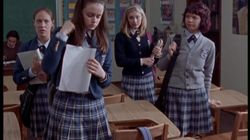

Now playing Kiss and Tell.


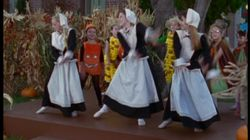

Now playing Forgiveness and Stuff.


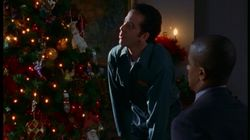

Now playing Concert Interruptus.


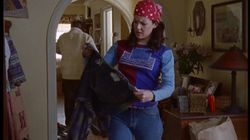

Now playing Star-Crossed Lovers and Other Strangers (1).


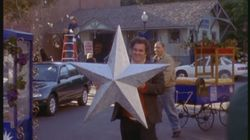

Now playing Emily in Wonderland.


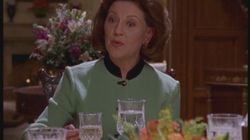

Now playing Sadie, Sadie.


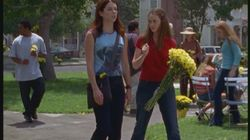

Now playing The Road Trip to Harvard.


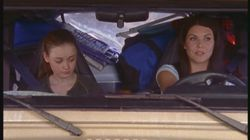

Now playing Like Mother, Like Daughter.


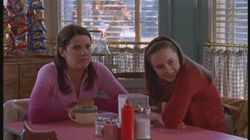

In [60]:
first_show.playSeries()

In [9]:
from codecs import namereplace_errors
from os import link


class Theater:
    def __init__(self):
        self.users = []
        self.watch_list = []
        self.current_user = None

    # add user
    def addUser(self, name = ''):
        if not name:
            name = input("What is the name of your new user? ")
        self.users.append(name.title())
        self.chooseUser()

    # choose_user
    def chooseUser(self):
        while True:
            print("Users: ")
            for user in self.users:
                print(user)
            current = input("Choose a user: ")
            if current.title() in self.users:
                self.current_user = current
                break
            else:
                print(f"{current} is not a user.")
            
    # add_to_watch_list
    def addToWatchList(self, query = ''):
        show = Series()
        show.getInfo(query)
        self.watch_list.append(show)
        print(f"{show.title} has been added to the watchlist!")

    #choose_from_watch_list
    def chooseFromWatchList(self):
        for series in self.watch_list:
            print(f"\n\n{series} | Episodes {len(series)}")
            print(f"\nSummary: \n {series.summary}")
            display(Image(series.episodes[0].link))

        watch = input("What do you want to watch? ")
        if watch.lower() in list(map(lambda x: x.title.lower(), self.watch_list)):
            for series in self.watch_list:
                if series.title.lower() == watch.lower().strip():
                    series.playSeries()
        else:
            response = input(f"{watch} is not in your watchlist. Would you like to add it? Y/N ")
            if response.lower() in ('yes', 'y'):
                self.addToWatchList(watch)
                self.watch_list[-1].play()

    # run
    def run(self):
        """
        Method allowing users to choose a series and play episodes
        """
        display(Image(generic_image))
        if self.users:
            self.chooseUser()
        else:
            name = input("Create a profile: ")
            self.addUser(name)
            self.current_user = name
        print(self.current_user)
        print("""
            What would you like do do?
            
            Search - Search for shows
            Watch - Pick something from your watch list
            Add - Add a new user
            Quit - Close the app
        """)

        while True:
            response = input("What would you like to do? (search, watch, add, quit")
            response = response.lower()
            if response == "search":
                self.addToWatchList()
            elif response == "watch":
                self.chooseFromWatchList()
            elif response == "add":
                self.addUser()
            elif response == "quit":
                print(f"Thanks for watching {self.current_user}. Go outside! Or not. I'm not your mom, I'm a computer. meep morp")
                break
            else:
                print("Invalid input. Please try again!")

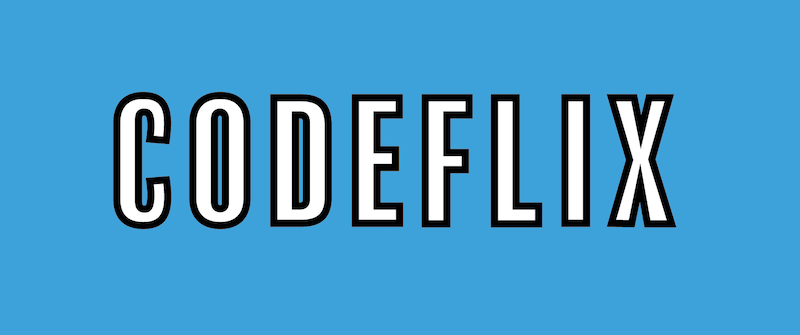

Users: 
Beck
beck

            What would you like do do?
            
            Search - Search for shows
            Watch - Pick something from your watch list
            Add - Add a new user
            Quit - Close the app
        
Gilmore Girls has 153 episodes.
Gilmore Girls has been added to the watchlist!
Game of Thrones has 73 episodes.
Game of Thrones has been added to the watchlist!
The Last Kingdom has 46 episodes.
The Last Kingdom has been added to the watchlist!
True Blood has 80 episodes.
True Blood has been added to the watchlist!


Title: Gilmore Girls | Episodes 153

Summary: 
 <p><b>Gilmore Girls</b> is a drama centering around the relationship between a thirtysomething single mother and her teen daughter living in Stars Hollow, Connecticut.</p>


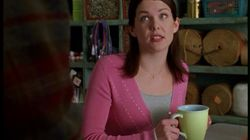



Title: Game of Thrones | Episodes 73

Summary: 
 <p>Based on the bestselling book series <i>A Song of Ice and Fire</i> by George R.R. Martin, this sprawling new HBO drama is set in a world where summers span decades and winters can last a lifetime. From the scheming south and the savage eastern lands, to the frozen north and ancient Wall that protects the realm from the mysterious darkness beyond, the powerful families of the Seven Kingdoms are locked in a battle for the Iron Throne. This is a story of duplicity and treachery, nobility and honor, conquest and triumph. In the <b>Game of Thrones</b>, you either win or you die.</p>


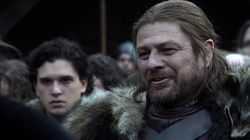



Title: The Last Kingdom | Episodes 46

Summary: 
 <p><b>The Last Kingdom</b> is a show of heroic deeds and epic battles but with a thematic depth that embraces politics, religion, warfare, courage, love, loyalty and our universal search for identity. Combining real historical figures and events with fictional characters, it is the story of how a people combined their strength under one of the most iconic kings of history in order to reclaim their land for themselves and build a place they call home.</p>


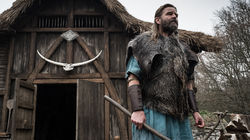



Title: True Blood | Episodes 80

Summary: 
 <p><b>True Blood </b>is a horror/drama based on a series of novels called <i>The Southern American Vampires Mysteries</i>. It focuses on Sookie Stackhouse and her various encounters with vampires and other supernatural beings. The show is centred in the small town of Bon Temps in Louisiana. The show focuses heavily on the co-existence of humans with vampires. The show also touches on several other controversial issues involving equal rights, violence, discrimination and religion.</p>


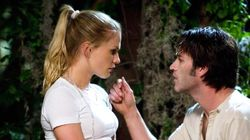

Now playing The Deer Hunters.


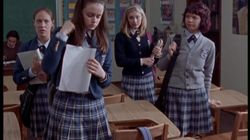

Invalid input. Please try again!
Thanks for watching beck. Go outside! Or not. I'm not your mom, I'm a computer. meep morp


In [11]:
codeflix = Theater()
codeflix.run()

##  Exercise 1:
Discuss what other classes, methods, or fields (attributes) we could make to improve our streaming service using these principles. <br> <br>
Start making a few of them and see where it leads...